# Exploring Player Engagement: Can Play Time and Player Age Predict Email Subscription for the PLAI Minecraft Server?


<font size = 4> **1)	Introduction**

**1.1	Background Summary**

>The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood, is a research group collecting data about how people play Minecraft, to develop a new responsive AI. They need better recruitment tactics to bring in more players who will provide large amounts of data, by having ample play time. In this proposal, we will be exploring a broad question of what "kinds" of players are most likely to contribute a large amount of data. This way a predictive analysis would be able to identify exactly what “kinds” of people/players to whom the PLAI should advertise. This can be done by finding any implicit groupings and relationships in the data via visual analyses from which conclusions can be drawn. To make this analysis possible it may be required to wrangle the data such that any missing values are removed, it is grouped by certain criteria, and useless data columns are removed.

**1.2	Research Question**

>This proposal aims to explore if a player’s age group and their playtime can make a predictive analysis on email subscriptions, consequently relating to the amount of data generated. Previous research has shown that customers/clients who are subscribed to a company’s email list, are more loyal to that company (Holland & Baker, 2001). As such we hypothesized that if players are subscribed to the email list, then they are more invested and loyal in the research of PLAI. As a result, they would have a proportionally higher play time than those who are not subscribed, resulting in more data for PLAI. We studied this by creating in-depth visualizations of a player’s age versus their play time coloured according to their subscription status. With this information we made a knn classification with playtime and player age as the predictor variables, to predict whether or not a player will be subscribed to the email list.

**1.3	Data Summary**

>The PLAI has provided two data sets, containing information on their current players: the Player dataset and the Sessions dataset. For this proposal, we will be focusing on the player data set since it provides the most relevant information to the research question. The player dataset is a multivariable dataset which describes the different types of players and their data. It is a data table with 7 columns and 196 rows (observations), which are a mix of character, logical, and double variable types. The 7 columns are defined as:
>- `experience`: A factor variable which is a self-declared level of familiarity by the player with Minecraft, where: 
    - Veteran = Very Familiar
    - Pro = Fairly Familiar 
    - Regular = Familiar 
    - Amateur = Slightly Familiar
    - Beginner = Not Familiar
>  - `subscribe`: A logical variable (True or False), that denotes if a player is signed up for the server email list.
>  - `hashedEmail`: A character variable which is an encrypted version of a player’s email.
>  - `hours_played`: A double variable which denotes the total amount of hours played on the server by a player.  
>  - `name`: A character variable that is the actual name of the player participating in this study.  
>  - `gender`: A character variable which is the self-identified gender of a player participating in this study.
    - Male
    - Female
    - Non-binary
    - Agender
    - Two-Spirited
    - Other
    - Prefer not to say
> - `Age`: A double variable which is the self-declared age of a player participating in this study.


<font size = 4>**2) Methods & Results**

**2.1 Loading in the Data**

>Firstly, we loaded in all necessary library packages required for our proposal and the raw data from github using `read_csv`.

In [1]:
#Loading library packages
library(repr)
library(tidyverse)
library(tidymodels)

#Setting the seed
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Loading in the data set
players_url <- "https://raw.githubusercontent.com/rachelbmgr/toy_ds_project/refs/heads/main/players.csv"
players <- read_csv(players_url)

head(players)
tail(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

experience subscribe
1 Amateur     TRUE    
2 Amateur     TRUE    
3 Veteran    FALSE    
4 Amateur    FALSE    
5 Amateur    FALSE    
6 Pro         TRUE    
  hashedEmail                                                      played_hours
1 644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6 0.0         
2 b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f 0.0         
3 71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd 0.3         
4 d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb 0.0         
5 f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436 2.3         
6 d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11 0.2         
  name   gender            Age
1 Rhys   Male              20 
2 Bailey Female            17 
3 Pascal Male              22 
4 Dylan  Prefer not to say 17 
5 Harlow Male              17 
6 Ahmed  Other             NA

*Table 1. First and Last 6 rows of the players dataset*
<br> <br>
**2.2 Cleaning and Wrangling the data**

>Looking at the data table, we notice that the `subscribe` column is `<lgl>` (logical), which must be changed to `<fct>` (factor), as it should be considered a categorical variable. It will also be more helpful to change the TRUE and FALSE observations in this column to 'subscribed' and 'not subscribed' to make it easier to understand future visualizations.
<br> <br>
We will also tidy our data by first filtering out 'NA' values in the `Age` column. Then only selecting `subscribe`, `played_hours`, and `Age` columns from the original data as the other 4 colums will not be used to answer our research question.
<br> <br>
The original played time data frame is in hours which we will change to minutes, so we have less near 0 values on our visualization (some people may play for less than 1 hour but more than 0 hours).

In [3]:
# Cleaning & Wrangling the data
players_tidy <- players |>
                filter(Age != 'NA') |>
                select(Age, subscribe, played_hours)

players_scale_time <- players_tidy |>
                mutate(played_mins = played_hours * 60) |>
                mutate(subscribe = as_factor(subscribe))  |>
                mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not subscribed" = "FALSE")) |>
                select(-played_hours)
                
head(players_scale_time)

Age subscribe      played_mins
1  9  Subscribed     1818       
2 17  Subscribed      228       
3 17  Not subscribed    0       
4 21  Subscribed       42       
5 21  Subscribed        6       
6 17  Subscribed        0

*Table 2. First 6 rows of the tidy players dataset (scaled in minutes)*
<br> <br>
**2.3 Summarizing the data**

>Here we summarize the data by looking at the mean age, and mean played minutes, by using `group_by` the `subscribe` column.

In [4]:
# Data summary
players_summary <- players_scale_time |>
                   group_by(subscribe) |>
                    summarize(mean_age = mean(Age),
                              mean_mins = mean(played_mins))
players_summary

subscribe      mean_age mean_mins
1 Not subscribed 22.98077  30.11538
2 Subscribed     19.61972 472.98592

*Table 3. Average ages and played minutes of players who have subscribed or not subscribed*
>The summarized table above tells us that on average those who are subscribed are typically younger and spend significantly more time on the server than those who are not subscribed. This aligns with our expectations outlined in the introduction.

**2.3 Visualizing Initial Relationship**

>Here we used ggplot to create a scatter plot with `played_mins` on the x axis, `Age`on the y axis, and color-coded points based on player's email subscription status (`subscribe`). We have also adjusted the domain on the x-axis to be from 0 to 450 minutes because many play times were concentrated at around 0 minutes. This helps make the visualization look less clustered and easier to spot any trends.

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


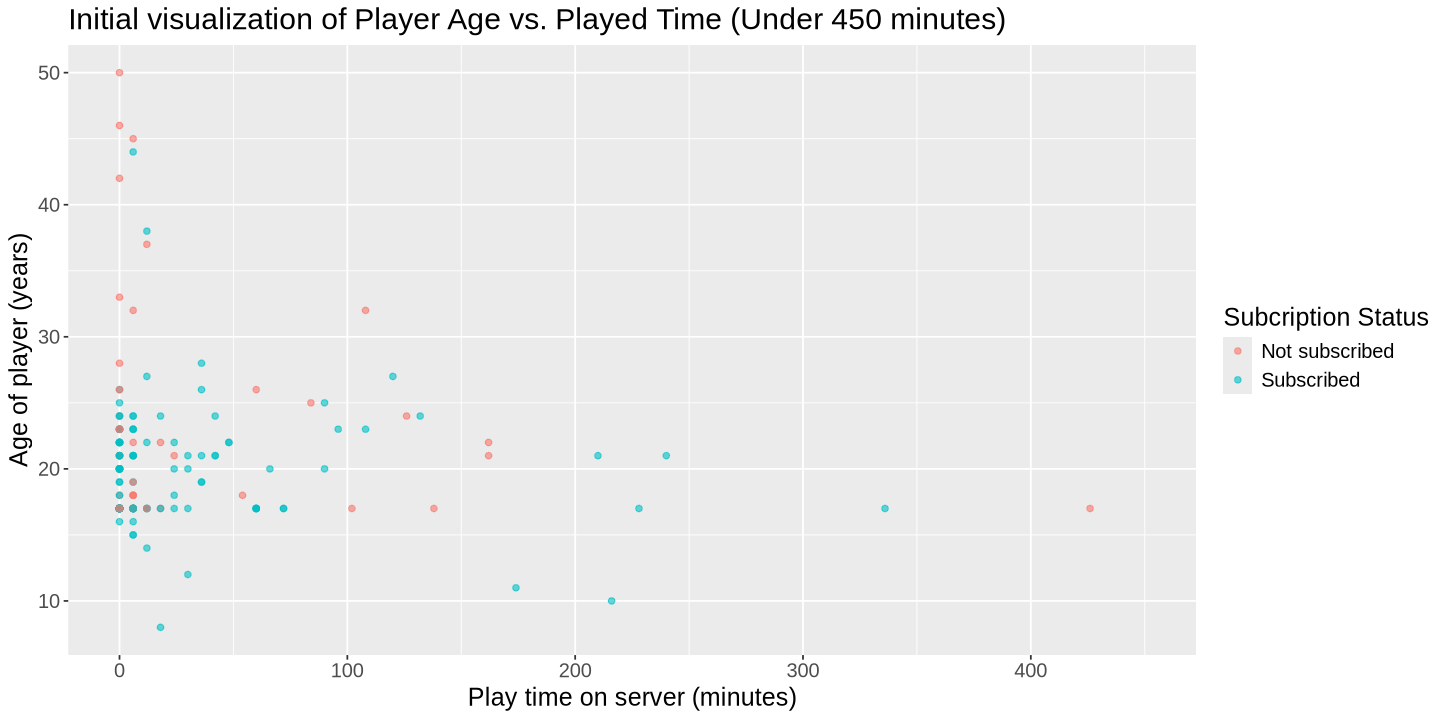

In [5]:
# Visulization of data set pre-knn
options(repr.plot.width = 12, repr.plot.height = 6)

intitial_players_plot <- players_scale_time |>
                    ggplot(aes(x = played_mins, y = Age, color = subscribe)) +
                    geom_point(alpha = 0.6) + 
                    xlab("Play time on server (minutes)") + 
                    ylab("Age of player (years)") + 
                    labs(color = "Subcription Status") +
                    ggtitle("Initial visualization of Player Age vs. Played Time (Under 450 minutes)") + 
                    xlim(c(0, 450)) +
                    theme(text = element_text(size = 15))

intitial_players_plot

*Figure 1. Scatterplot of player's age and play time that ranged under 450 minutes*
<br> <br>
**2.4 Tuning and determining the best K value for KNN Classification**

>With our initial visualization we are now fairly confident that there may a relaionship between subscription status and a player's playtime and their age. As such, since we have two quantitative variables predicting a factor variable the best prediction model to affirm our hypothesis will be a knn classification. Where player age and play time are being used to predict subscription status. Before we can make properly measure the accuracy of our designed knn model, we have to tune the model first to determine the best K value.

In [6]:
# Splitting Dataset
players_split <- initial_split(players_scale_time, prop = 0.75, strata = subscribe) 
players_train <- training(players_split)
players_test <- testing(players_split)

In [7]:
# Determining best KNN value 
# Create tune model
players_recipe <- recipe(subscribe ~ Age + played_mins, data = players_train) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 5 fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

#Sequence of K values being tested
kvals <- seq(from = 1, to = 10, by = 1)

# Creating workflow
knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = players_vfold, grid = tibble(neighbors = kvals)) |>
                 collect_metrics()

k_accuracies <- knn_results |>
              filter(.metric == "accuracy") |>
              select(neighbors, mean)

head(k_accuracies)

neighbors mean     
1 1         0.4489655
2 2         0.4558621
3 3         0.5445813
4 4         0.5248276
5 5         0.5855172
6 6         0.5507553

*Table 4. First 6 K values with their respective accuracies*

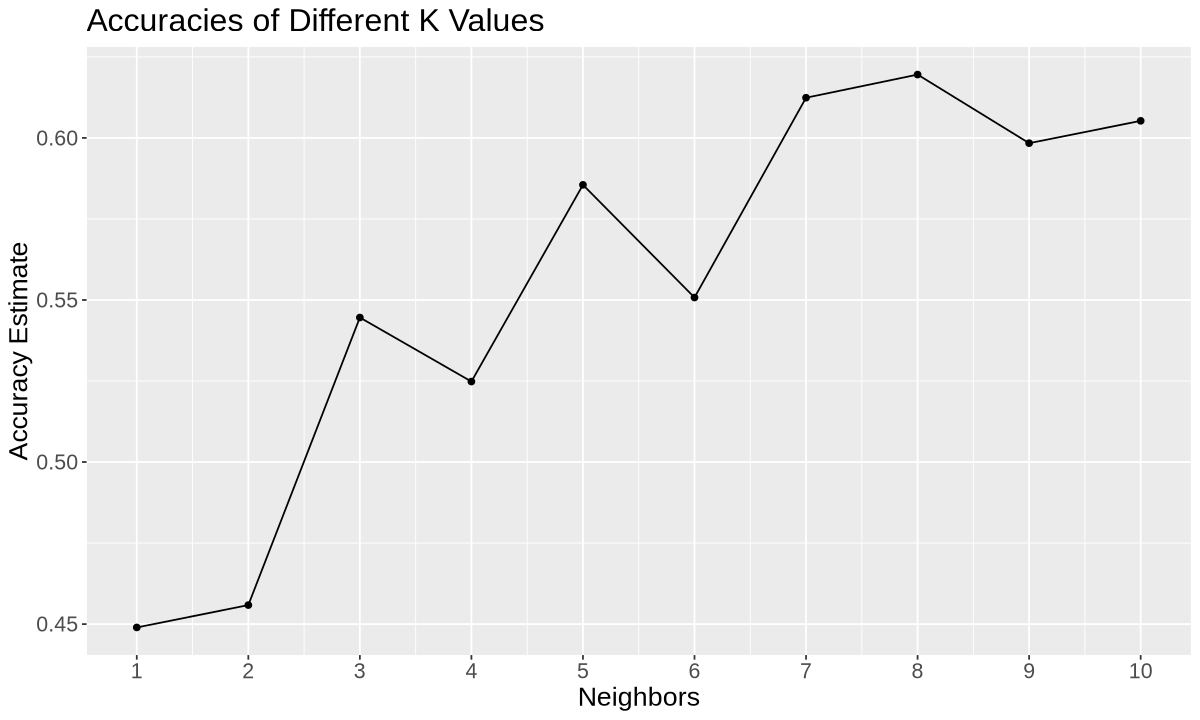

In [8]:
# Cross validation plot
options(repr.plot.width = 10, repr.plot.height = 6)
cross_val_plot <- k_accuracies |>  
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', 
                       y = 'Accuracy Estimate',
                       title = 'Accuracies of Different K Values') +
                  scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))  +
                  theme(text = element_text(size = 16))
cross_val_plot

*Figure 2. Estimated accuracies of K values ranging from 1 to 10, obtained by performing 5-folds cross-validation on players training dataset*
<br> <br>
>A K value of 8 seems to be the best choice, as it has the greatest accuracy and no steep drops before or after it.

<br> <br>
**2.5 Final KNN Classification Model**
>We will first create our final knn classification model based on the best k value determined above and also visually check whether this value is not overfitting or underfitting.

In [16]:
# Training the final classification model with best k
fin_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
  set_engine("kknn") |>
  set_mode("classification")

fin_knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(fin_knn_spec) |>
  fit(data = players_train)

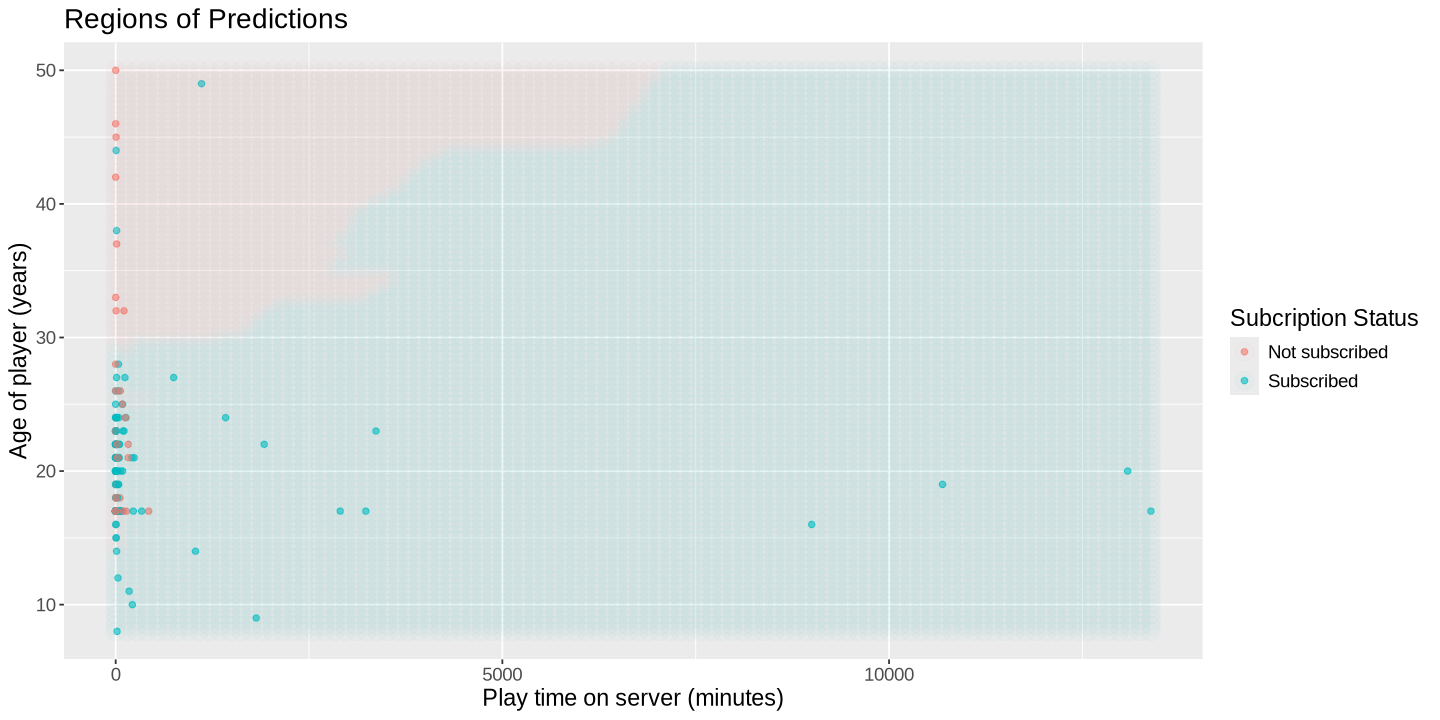

In [17]:
#Setting up to produce colored background based on predictions made for subscription status
time_grid <- seq(min(players_scale_time$played_mins),
                 max(players_scale_time$played_mins),
                 length.out = 100)

age_grid <- seq(min(players_scale_time$Age),
                 max(players_scale_time$Age),
                 length.out = 100)

asgrid <- as_tibble(expand.grid(played_mins = time_grid,
                                Age = age_grid))

knnPredGrid <- predict(fin_knn_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
                    rename(subscribe = .pred_class)


#Creating plot that show prediction regions on the whole players dataset
options(repr.plot.width = 12, repr.plot.height = 6)

evaluate_k_plot <- ggplot() +
                    geom_point(data = players_scale_time,
                              mapping = aes(x = played_mins,
                                            y = Age,
                                            color = subscribe),
                              alpha = 0.6) +
                    geom_point(data = prediction_table,
                               mapping = aes(x = played_mins,
                                             y = Age,
                                             color = subscribe),
                               alpha = 0.02,
                               size = 5) +
                    labs(x = "Play time on server (minutes)", 
                         y = "Age of player (years)", 
                         color = "Subcription Status",
                         title = "Regions of Predictions") +
                    theme(text = element_text(size = 15))
evaluate_k_plot

*Figure 4. Color-coded regions based on predictions of player's subscription status*
<br> <br>
The boundaries between the two regions are relatively smooth and not too jagged. Therefore, we can conclude that chosen K value of 8 is neither overfitting or underfitting.
<br> <br>
**2.6 Evaluating the Performance of KNN Classification Model**

>Now that we trained our final model, we will apply it to the testing set and evaluate its performance and quality. This is will done by creating a confusion matrix and collecting various metrics such as accuracy, precision, and recall with "Subscribed" status as our positive label.

In [21]:
# Applying the model to the testing set
players_test_prediction <- predict(fin_knn_fit, players_test) |>
                        bind_cols(players_test)

# Confusion matrix
confusion_mat <- players_test_prediction |>
                 conf_mat(truth = subscribe, estimate = .pred_class)
confusion_mat

#Accuracy of predictions
players_test_prediction |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

#Precision of predictions
players_test_prediction |>
    precision(truth = subscribe, estimate = .pred_class, event_level ="second")

#Recall of predictions
players_test_prediction |>
    recall(truth = subscribe, estimate = .pred_class, event_level ="second")

                Truth
Prediction       Not subscribed Subscribed
  Not subscribed              3          5
  Subscribed                 10         31

.metric  .estimator .estimate
1 accuracy binary     0.6938776

.metric   .estimator .estimate
1 precision binary     0.7560976

.metric .estimator .estimate
1 recall  binary     0.8611111

*Figure 5. (From the top) Confusion matrix and tables outlining the accuracy, precision, and recall of predictions made by the final model on the testing set*
<br> <br>
<font size = 4>**3) Discussion**

**3.1 Result Summary**

>In this proposal, we explored the question: "Can play time and player age predict email subscription for the PLAI Minecraft server?" To answer this question, we created a knn classifier that used played time and player age as predictor variables to predict a player's email subscription status. Our classifier had an accuracy of around 69%, precision of 76%, and recall of 86% when applied to the testing set. Although precision and recall are relatively high, low overall accuracy indicate that our classifer is not as effective when applied to a new set of data. A reason for this is that the testing set had class imbalance, where it had 36 data points for "subscribed" and only 13 points for "not subscribed" (calculated from the confusion matrix). Class imbalance is a common weakness of any knn classification models and our model must have been more influenced to predict the more common or abundant "subscribed" label. This explains why it had a harder time predicting "not subscribed" and had more false positive predictions, which resulted in lowering both accuracy and precision. 
>
>Furthermore, the low performance of our classifier also suggests that the relationship between played time, player age, and email subscription is not as strong, thus harder for the classifier to predict. This contradicts with our expectations as we hypothesized that players with a longer play time are more invested and loyal to the game, therefore would be more likely to subscribe to the email list. However, as seen from our initial visualization of player age vs. played minutes (Figure 1), many players who play less (under 50 minutes) are also subscribed. Therefore, suggests that there may be other factors that influence whether a player subscribes to email or not.  

**3.2 Impact For PLAI**

> While our classifier’s performance was not the best, there are still things that can be taken away. Since age and playtime were not strong indicators for email subscription, this suggests that there are more nuanced factors that influence player subscription to be found. Additionally, since many players who played under 50 minutes are subscribed, it shows that a player's first impression of the server may have an impact on subscription status, as it doesn’t take much time for them to subscribe.
> 
> This could lead PLAI to experiment with different ways to hook players in from the beginning. This could prompt the future question: Why are so many players who have very little playtime subscribed? This could lead to future discussions on the importance of external influence on the players' subscription rate. It could be possible that many players were subscribed because of their prior interest in PLAI. This could prompt future discussions that include how the player found PLAI. It could also be of interest to see if any specific in-game achievements or events were encountered early on that could have spiked the interest of the players. As they could also be important factors that caused the players to subscribe.

<font size = 4>**4) References**

(1) Holland, J.; Baker, S. M. Customer participation in creating site brand loyalty. Journal of 	Interactive Marketing 2001, 15 (4), 34–45. https://doi.org/10.1002/dir.1021. 


